<a href="https://colab.research.google.com/github/camiscf/tcc/blob/main/CoCaDa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entendimento do trabalho

Neste trabalho iremos entender como as empresas se agrupam em relação à volatilidade e retorno diários de suas ações na bolsa de valores no período de 01/02/2020 até 17/12/2023 ano para:

1. Entender o comportamento delas e indentificar similaridades entre as empresas e garantir a segurança em investir

2. No futuro poder recomendar ações para clientes com base em seu interesse e perfil

### Entendimento dos dados

Para esse trabalho será utilizado uma lista da wikipédia com 500 empresas na bolsa de valores e seus TICKERS (Ticker é um código usado na bolsa de valores para identificar e negociar um determinado ativo.)

Fonte: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


### Importanto bibliotecas

In [ ]:
import math

import numpy as np
import pandas as pd

# Biblioteca com dados do yahoo finance
import yfinance as yf

# Preprocessamento
from sklearn.preprocessing import StandardScaler

# Redução de dimensionalidade
from sklearn.decomposition import PCA

# Clusterização
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Avaliação
from sklearn.metrics import silhouette_samples, silhouette_score

# Visualização
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import matplotlib.pyplot as plt

### Carregando os dados
Iremos calcular a média do retorno e a volatilidade de cada empresa pelo o seu preço de fechamento diário durante o período de 01/02/2020 até 17/12/2023

Para calcularmos o retorno médio e a volatilidade média precisamos saber quantos dias úteis existe dentro do intervalo de tempo que definimos, uma vez que a bolsa de valores só funciona em dias úteis.

In [ ]:
start_date = '2020-01-02'
end_date = '2023-12-17'

# Convertendo as datas para o formato datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Criando um intervalo de datas
date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' significa business days

# Calculando o número de dias úteis
num_business_days = len(date_range)

print(f'O número de dias úteis entre {start_date} e {end_date} é: {num_business_days} dias úteis.')


O número de dias úteis entre 2020-01-02 00:00:00 e 2023-12-17 00:00:00 é: 1032 dias úteis.


In [ ]:
# Determinando a url
companies_500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read in the url and scrape ticker data
data_table = pd.read_html(companies_500_url)
tickers = data_table[0]['Symbol'].values.tolist()
tickers = [s.replace('\n', '') for s in tickers]
tickers = [s.replace('.', '-') for s in tickers]
tickers = [s.replace(' ', '') for s in tickers]
sectors = data_table[0]['GICS Sector'].values.tolist()

start_date = '2020-01-02'
end_date = '2022-12-02'

prices_list = []
for ticker in tickers:
    try:
        prices =  yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)
prices_df.sort_index(inplace=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1577941200, endDate = 1669957200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1577941200, endDate = 1669957200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1577941200, endDate = 1669957200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [ ]:
# Create an empity dataframe
returns = pd.DataFrame()

# Define the column Returns
returns['Returns'] = prices_df.pct_change().mean() * num_business_days

# Define the column Volatility
returns['Volatility'] = prices_df.pct_change().std() * math.sqrt(num_business_days)

### Analisando o dataset

In [ ]:
returns

,Returns,Volatility
MMM,-0.175155,0.586369
AOS,0.632096,0.667594
ABT,0.557249,0.611645
ABBV,1.173244,0.543564
ACN,0.790269,0.663067
...,...,...
YUM,0.601530,0.631722
ZBRA,0.427175,0.864444
ZBH,0.083234,0.750119
ZION,0.540275,0.930054


Vemos que temos as 503 empresas biblioteca da yfinance e temos duas colunas que seria o retorno médio e a volatidade média

Vamos analisar também a média, desvio padrão e entender o que esta acontencendo no nosso dataset

In [ ]:
returns.describe()

,Returns,Volatility
count,500.000000,500.000000
mean,0.759567,0.824838
std,0.644610,0.233344
min,-1.006144,0.424684
25%,0.401277,0.665974
50%,0.689028,0.765932
75%,1.017838,0.935336
max,4.711784,1.908513


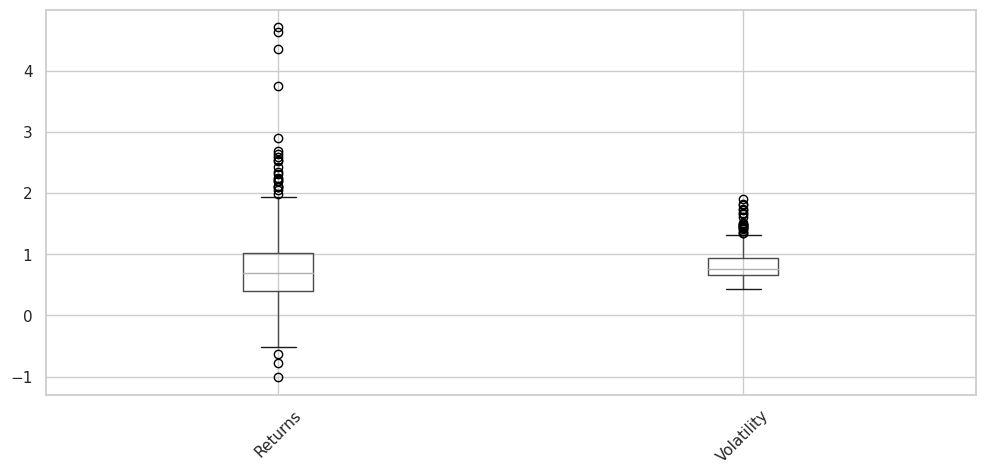

In [ ]:
returns.boxplot(figsize=(12,5))
plt.xticks(rotation=45)
plt.show()

Podemos ver que a ordem de grandeza do retorno é maior que a volatilidade. Isso mostra que talvez seja uma boa ideia normalizar os atributos.
Além de que podemos ver que o retorno tem uma distribuição muito mais simétrica que a volatilidade, mais também o retorno tem mais valores atípicos, a maioria mais positivo do que negativo. Enquanto, por outro lado, a volatilidade tem apenas valores atípicos positivos.

Certo, mas o que isso significa ?
Significa que mesmo tendo um bom intervalo, um conjunto de empresas ainda destoa da maioria.

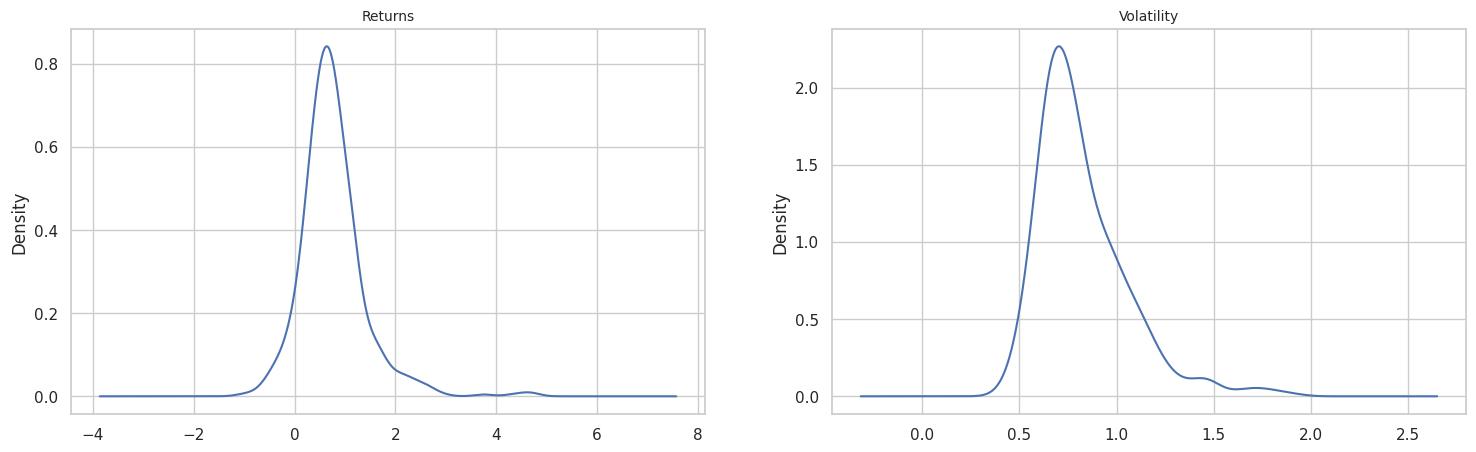

In [ ]:
cols = returns.columns
fig, axs = plt.subplots(1, len(cols), figsize=(18,5))
for idx, col in enumerate(cols):
  returns[col].plot.density(ax=axs[idx])
  axs[idx].set_title(col, fontsize=10)
plt.show()

Aqui temos a distribuição da densidade de probabilidade e podemos ver que as curvas são parecidas, mas podemos perceber que não há nenhum valor categórico no dataset e com isso não precisamos fazer o one-hot

### Preparação dos dados

Agora iremos formatar os dados para utilizarmos no modelo. Vamos verificar se há inconsistëncias e limpar os dados, normalizar e reduzir a dimensionalidade.

Os dados serão normalizados para melhorar nosso trabalho. Vamos verificar que após a normalizaçãop tudo possui média zero e variância unitária

In [ ]:
scaler = StandardScaler()
returns_normalized = scaler.fit_transform(returns)
pd.DataFrame(returns_normalized).describe()

,0,1
count,5.000000e+02,5.000000e+02
mean,-5.684342e-17,2.948752e-16
std,1.001002e+00,1.001002e+00
min,-2.741937e+00,-1.716583e+00
25%,-5.563808e-01,-6.814929e-01
50%,-1.095377e-01,-2.526966e-01
75%,4.010643e-01,4.740176e-01
max,6.137322e+00,4.648755e+00


#### Redução de dimensionalidade
Para a clusterização, a redução de dimensionalidade PCA vai ser usada para remover um ruído no ddado e melhorar clusterização. Para analisar a componente para escolher o valor apropriado

In [ ]:
returns_normalized = scaler.fit_transform(returns)
# Remova as amostras que contêm NaN
returns_normalized = returns_normalized[~np.isnan(returns_normalized).any(axis=1)]

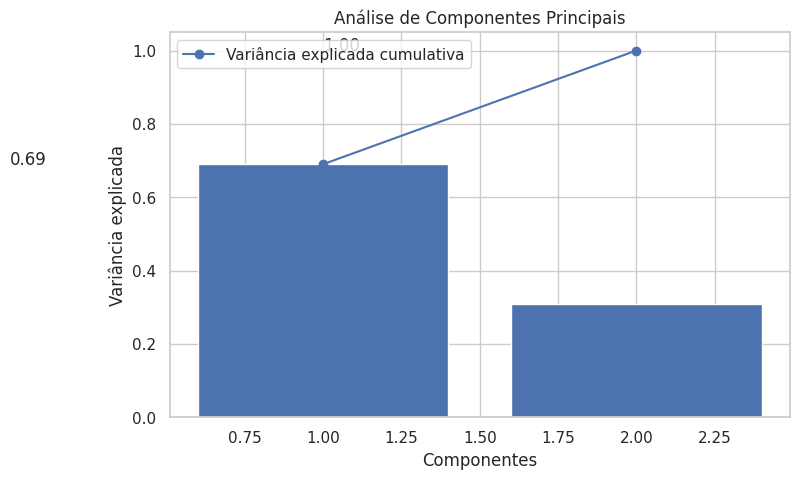

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(returns_normalized)

variance_sum = np.zeros(len(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(8,5))
for idx, variance in enumerate(pca.explained_variance_ratio_):
  variance_sum[idx] = variance_sum[idx-1] + variance
  plt.text(idx, variance_sum[idx], "%.2f" % variance_sum[idx])

plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), variance_sum, marker='o',
         label="Variância explicada cumulativa")

plt.ylabel('Variância explicada')
plt.xlabel('Componentes')
plt.legend(loc='upper left')
plt.title("Análise de Componentes Principais")
plt.show()

Esse *plot* foi mais para entendermos a variäncia acumulativa, onde o retorno corresponde 69% da variância explicada, enquanto a volatilidade corresponde à 31%

In [ ]:
N_COMPONENTS = 2

In [ ]:
pca_cols = ["PC%d" %i for i in range(1, N_COMPONENTS+1)]
returns_pca = pd.DataFrame(principalComponents[:,:N_COMPONENTS], columns=pca_cols)
returns_pca.head()

,PC1,PC2
0,-1.749732,0.303015
1,-0.616944,-0.337006
2,-0.868843,-0.424532
3,-0.398961,-1.307441
4,-0.456994,-0.524421


In [ ]:
returns_pca.shape

(500, 2)

### Modelagem

Nesta etapa precisamos escolher o modelo alinhado com o nosso interesse, identificando os hiperparâmetros em cada modelo e avaliar como sua alteração afeta o resultado.

Como a ideia é classificar as empresas para que futuramente elas sejam recomendadaas, então entender como os diferentes grupos, os melhores modelos são os de clusterização, que agrupam itens parecidos. Para isso, escolhemos o K-Means e hierárquico, mas outros são possíveis como a mistura gaussinam spectral clustering, e assim por diante.

#### K-Means

In [ ]:
N_CLUSTERS = 10

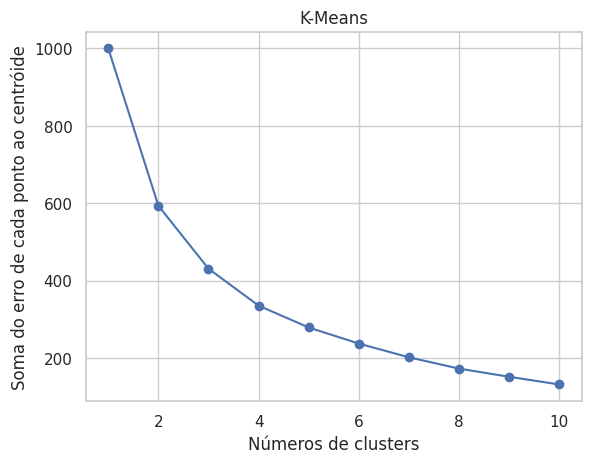

In [ ]:
erro = []
models_kmeans = []
for i in range(1, N_CLUSTERS+1):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init=100).fit(returns_pca)
  models_kmeans.append(kmeans)
  erro.append(kmeans.inertia_)

plt.plot(range(1, N_CLUSTERS+1), erro, marker='o')

plt.ylabel('Soma do erro de cada ponto ao centróide')
plt.xlabel('Números de clusters')
plt.title("K-Means")
plt.show()

Como podemos ver uma inflexão da curva em 3 clusters, onde podemos considerar que se encontra o cotovelo. Então vamos seguir a analise com 3 clusters no K-Means.

#### Hierárquico

In [ ]:
# Recuperando os valores do modelo com 3 clusters
labels_kmeans = models_kmeans[2].labels_

In [ ]:
erro = []
models_agg = []
for i in range(1, N_CLUSTERS+1):
  agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean',
                                linkage='ward').fit(returns_pca)
  models_agg.append(agg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

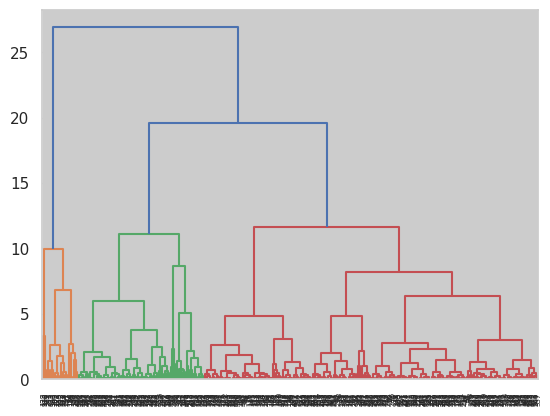

In [ ]:
# De acordo com a documentação do Scipy: corresponding with MATLAB(TM) behavior, the threshold is set to 0.7*max(Z[:,2]),
# onde Z representa as distâncias entre os clusters (linkage)
dendrogram = sch.dendrogram((sch.linkage(returns_pca, method ='ward')))

Em ambas clusterizações, escolhemos 3 como sendo um ótimo número de clusters. Então agora vamos comparar os dois modelos utilizando a métrica da silhueta

In [ ]:
# Recuperando os valores do modelo com 3 clusters
labels_agg = models_agg[2].labels_

### Avaliação
Vamos avaliar o resultado de acordo com o esperado, avalisando os modelos definidos na etapa anterior e onde é possível melhorar.

Para isso, vamos utilizar a silhueta para avaliar os dois modelos e verificar se eles produzem clusters compactos e separados.

In [ ]:
def calculate_silhouette(n_clusters, X, cluster_labels):
  silhouette_avg = silhouette_score(X, cluster_labels)
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
  plt.title("Silhueta")
  plt.xlabel("Valores da silhueta")
  plt.ylabel("Cluster")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")
  plt.text(silhouette_avg, 0.5, "%.2f" % silhouette_avg, color='red')

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

  return silhouette_avg, sample_silhouette_values

### K-Means


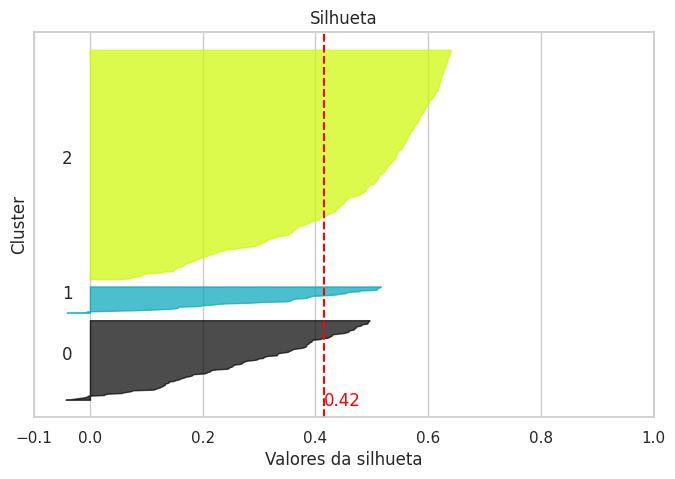

Silhueta média = 0.42


In [ ]:
fig = plt.figure(figsize=(8,5))
silhouette_avg, sample_silhouette_values = calculate_silhouette(3, returns_pca, labels_kmeans)
print("Silhueta média = %.2f" % silhouette_avg)

Verificando as observações com silhueta baixa

In [ ]:
print(np.where(sample_silhouette_values < 0))
sample_silhouette_values[np.where(sample_silhouette_values < 0)]

(array([ 44,  70, 146, 155, 207, 219, 238, 251, 347, 459]),)


array([-0.04135207, -0.02383106, -0.00681399, -0.03250065, -0.01462277,
       -0.00436728, -0.00358463, -0.04328144, -0.00801303, -0.00542094])

### Hierárquico

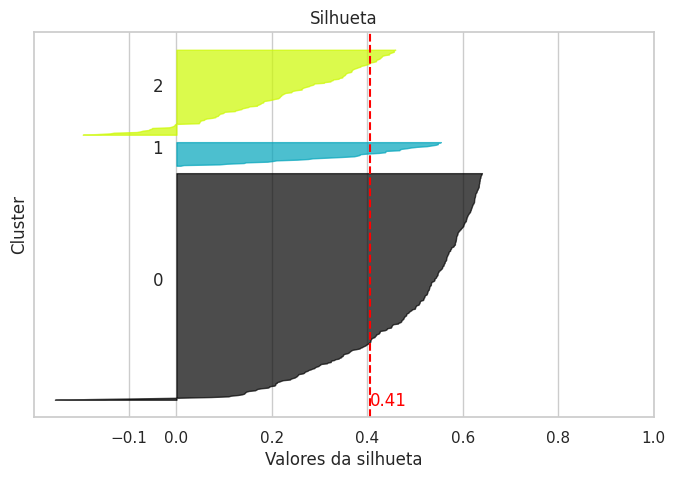

Silhueta média = 0.41


In [ ]:
fig = plt.figure(figsize=(8,5))
silhouette_avg, sample_silhouette_values = calculate_silhouette(3, returns_pca, labels_agg)
print("Silhueta média = %.2f" % silhouette_avg)

Verificando as observações com silhueta baixa

In [ ]:
print(np.where(sample_silhouette_values < 0))
sample_silhouette_values[np.where(sample_silhouette_values < 0)]

(array([ 72,  89,  93, 144, 155, 194, 195, 200, 207, 223, 224, 293, 298,
       345, 347, 377, 387, 437, 469, 477]),)


array([-0.00648306, -0.25473211, -0.00164332, -0.0706619 , -0.05105881,
       -0.19642033, -0.01528832, -0.07554811, -0.05197644, -0.00400426,
       -0.08332814, -0.05823733, -0.13897093, -0.18184212, -0.05663694,
       -0.00967552, -0.083119  , -0.1653026 , -0.00378608, -0.1311298 ])

A métrica de silhueta é uma medida de validação interna para avaliar a qualidade da clusterização. Ela varia de -1 a 1, onde:

Um valor próximo de 1 indica que o objeto está bem dentro do seu próprio cluster e longe dos clusters vizinhos.
Um valor próximo de -1 indica que o objeto pode estar no cluster errado.
Um valor próximo de 0 indica que o objeto está na fronteira entre dois clusters.
Portanto, quanto mais próximo de 1, melhor é a qualidade da clusterização.

No seu caso, você está utilizando o método de K-means e o método hierárquico para realizar a clusterização. A métrica de silhueta média é uma média dos valores de silhueta para todos os pontos nos seus dados. Uma média maior indica uma clusterização mais coesa.

K-means com silhueta média de 0.42: Indica uma boa coesão entre os pontos dentro dos clusters formados pelo K-means.
Hierárquico com silhueta média de 0.41: Também indica uma boa coesão e muito próximo do K-means
O método hierárquico pode produzir clusters mais naturais, especialmente se a estrutura dos seus dados tiver relações hierárquicas claras. No entanto, a escolha entre K-means e hierárquico depende muito da natureza dos dados e dos objetivos específicos da análise.

No caso em específico, iremos avançar com o K-Means por causa da sua consistência um pouco maior

In [ ]:
# Adicione os rótulos de cluster ao DataFrame original
returns_with_labels = returns.copy()
returns_with_labels = returns_with_labels.iloc[:-3, :]
returns_with_labels['Cluster'] = labels_kmeans

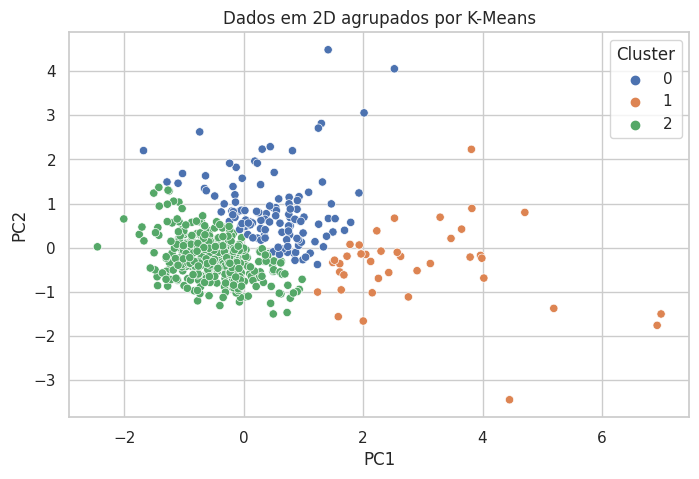

In [ ]:

# Crie um gráfico de dispersão colorido por cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=returns_pca.to_numpy()[:, 0], y=returns_pca.to_numpy()[:, 1], hue=returns_with_labels['Cluster'], palette="deep")
plt.title("Dados em 2D agrupados por K-Means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Em contextos de Análise de Componentes Principais (PCA), "PC1" e "PC2" referem-se às duas primeiras componentes principais. Quando você aplica PCA a um conjunto de dados, ele encontra novas direções (chamadas de componentes principais) ao longo das quais os dados têm a maior variabilidade.

PC1 (Principal Component 1): Representa a direção no espaço dos dados ao longo da qual ocorre a máxima variação. Em um contexto financeiro, PC1 representa uma combinação linear de 'Returns' e 'Volatility' que captura a maior parte da variação nos retornos e na volatilidade dos ativos.

PC2 (Principal Component 2): Representa a segunda direção no espaço dos dados que captura a segunda maior variação. PC2 é ortogonal a PC1, o que significa que ele representa uma direção diferente no espaço dos dados. Em um contexto financeiro, PC2 pode capturar padrões adicionais ou relacionamentos entre 'Returns' e 'Volatility' que não foram capturados por PC1.

### Interpretação dos clusters

Para entender a característica de cada cluster, podemos tratar o cluster como labels e entender a distribuição dos valores para cada grupo no *espaço original*. Se utilizar o espaço reduzido com PCA, ficaria difícil a interpretação das características de cada cluster, então vamos adicionar os lables como uma coluna nos dados

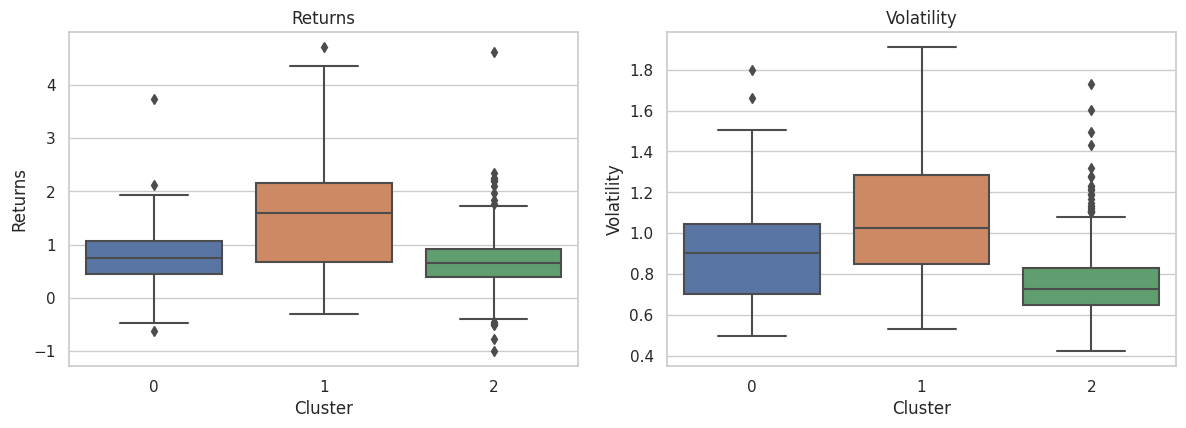

In [ ]:
# Cria boxplots para cada variável em cada cluster
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
for idx, col in enumerate(returns.columns):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(x='Cluster', y=col, data=returns_with_labels, palette="deep")
    plt.title(col)
    plt.xlabel("Cluster")
    plt.ylabel(col)
plt.tight_layout()
plt.show()



Com os bloxplots temos que a caixa representa o intervalo que a caraterística representa, a linha do meio é a mediana que representa o valor que divide os dados ao meio. As hastes representam os valores extremos e os valores foram dela (pontos isolados) são valores atípicos.

Agora vamos para a interpretação específica de cada caso:
1. retorno:
Podemos ver que o cluster azul e o cluster verde tem uma distribuição quase que simétrica em relação a essa propriedade da ação. Diferente do cluster laranja que tem uma distribuição assimétrica
2. volatilidade:
Podemos ver que todos os 3 clusters tem uma distribuição assimétrica, mas o cluster verde é o que tem uma menor assimétria quando comparado aos outros.

Certo, mas o que isso significa ?
Em termos de retorno, podemos falar que o retorno mais "incerto" é o do cluster laranja, enquanto em termos de volatilidade, todos sofrem uma variação, mas o que sofre menos variação é o verde


<ipython-input-86-93bd7217d3b6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns_with_labels.loc[returns_with_labels['Cluster'] == cluster, col], label=f'Cluster {cluster}', shade=True)
<ipython-input-86-93bd7217d3b6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns_with_labels.loc[returns_with_labels['Cluster'] == cluster, col], label=f'Cluster {cluster}', shade=True)
<ipython-input-86-93bd7217d3b6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns_with_labels.loc[returns_with_labels['Cluster'] == cluster, col], label=f'Cluster {cluster}', shade=True)
<ipython-input-86-93bd7217d3b6>:8: FutureWarni

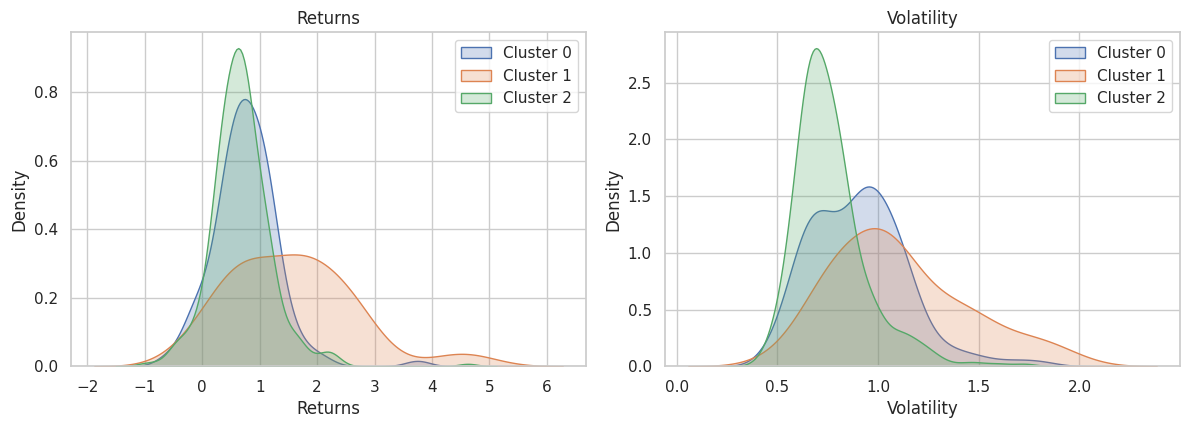

In [ ]:
# Cria gráficos de densidade de probabilidade para cada variável em cada cluster
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

for idx, col in enumerate(returns.columns):
    plt.subplot(3, 3, idx + 1)
    for cluster in sorted(returns_with_labels['Cluster'].unique()):
        sns.kdeplot(returns_with_labels.loc[returns_with_labels['Cluster'] == cluster, col], label=f'Cluster {cluster}', shade=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Cada subgráfico exibe a estimativa da densidade de probabilidade de uma coluna específica do DataFrame (Retorno e volatilidade). Isso é útil para visualizar a distribuição dos dados em cada coluna e identificar padrões ou características específicas.

Pela análise de distribuição de densidade dos atributos, podemos perceber algumas características:
1. O cluster verde tem um baixo retorno quando comparado aos cluster azul que possui um retorno quase igual, porém o cluster laranja tem um retorno muito mais alto quando comparado aos outros.
2. Em termos de volatilidade, temos que a volatilidade do verde é bem baixa quando comparada ao cluster azul e laranja que possuem uma volatilidade bem próxmimas.

Mas o comportamento mais interessante que temos aqui é o comportamento do azul, pois ele tem um retorno tão alto quanto o cluster verde e o uma volatilidade quase tão alta quanto o cluster laranja.

## Conclusão:
O que nos leva ao seguinte pensamento:
- *Cluster Verde:* baixo retorno e baixo volatilidade (conversador)
- *Cluster Azul:* retorno quase tão alto e volatilidade moderada (moderado)
- *Cluster laranja:* alto retorno e alto volatilidade (arriscado)

Isso signifca que para um investidor de perfil arriscado seria mais interessante recomendar empresas do grupo verde, enquanto para um investidor com perfil mais seguro seria mais interessante recomendar empresas do grupo laranja.

##### Utilizando árvore de decisão para entender os clusters

Aqui podemos dividir os dados que indicam as propriedades de cada classe, ela analisa cada atributo por vez e cria uma árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

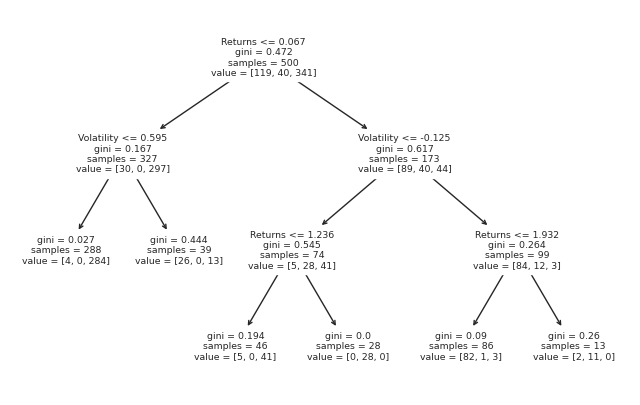

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=6)
clf.fit(returns_pca, labels_kmeans)
plt.figure(figsize=(8,5))
tree.plot_tree(clf, feature_names=cols)
plt.show()

## Outra análise interessante

Agora vamos analisar o comportamento das empresas em relação ao setor, ou seja, entender qual setor tem maior retorno, maior volatilidade, um comportamento mais seguro e assim por diante

####  Preparando os dados

Aqui pegamos os setores de cada empresa e juntamos em um só dataframe


In [ ]:
# Determinando a url
companies_500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read in the url and scrape ticker data
data_table = pd.read_html(companies_500_url)
tickers = data_table[0]['Symbol'].values.tolist()
sectors = data_table[0]['GICS Sector'].values.tolist()

# Criando o DataFrame 'sectors'
sectors_df = pd.DataFrame({'Symbol': tickers, 'Sector': sectors})
sectors_df

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


Vamos ver quais são os setores de fato:

In [ ]:
unique_sectors = sectors_df['Sector'].unique()
unique_sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

Vamos juntar o dataframe de setores com o nosso dataframe original que possui o retorno e a volatilidade:

In [ ]:
# Readicionando a coluna de setores ao DataFrame 'returns'
returns_with_sectors = returns.copy()

# Ajuste para lidar com símbolos não presentes em sectors_df
returns_with_sectors['Sector'] = [sectors_df.loc[sectors_df['Symbol'] == symbol, 'Sector'].values[0] if symbol in sectors_df['Symbol'].values else 'Unknown' for symbol in returns.index]

In [ ]:
returns_with_sectors

,Returns,Volatility,Sector
MMM,-0.175155,0.586369,Industrials
AOS,0.632096,0.667594,Industrials
ABT,0.557249,0.611645,Health Care
ABBV,1.173244,0.543564,Health Care
ACN,0.790269,0.663067,Information Technology
...,...,...,...
YUM,0.601530,0.631722,Consumer Discretionary
ZBRA,0.427175,0.864444,Information Technology
ZBH,0.083234,0.750119,Health Care
ZION,0.540275,0.930054,Financials


Aqui iremos agregar o setor com sua característica específica

In [ ]:
# Análise estatística agregada por setor
sector_stats = returns_with_sectors.groupby('Sector').agg({'Returns': 'mean', 'Volatility': 'mean'})
sector_stats

,Returns,Volatility
Sector,,
Communication Services,0.262676,0.817355
Consumer Discretionary,0.791803,0.999599
Consumer Staples,0.594511,0.612213
Energy,1.610400,1.200082
Financials,0.650205,0.825481
Health Care,0.746304,0.746551
Industrials,0.762201,0.787302
Information Technology,0.971171,0.871914
Materials,0.903810,0.837320


### Mais gráficos


Text(0.5, 0, 'Média de Retornos')

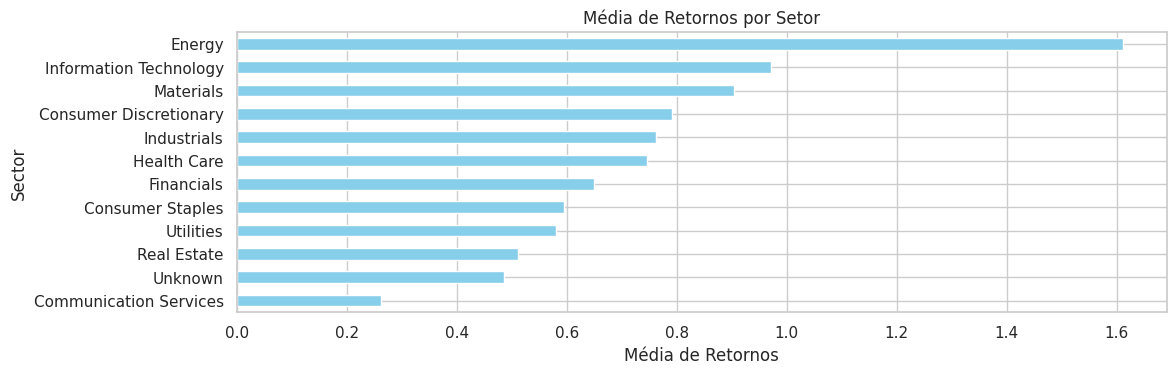

In [ ]:
# Visualizar as análises
plt.figure(figsize=(12, 8))

# Gráfico de barras para média de retornos por setor
plt.subplot(2, 1, 1)
sector_stats['Returns'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Média de Retornos por Setor')
plt.xlabel('Média de Retornos')

Text(0.5, 0, 'Média de Volatilidade')

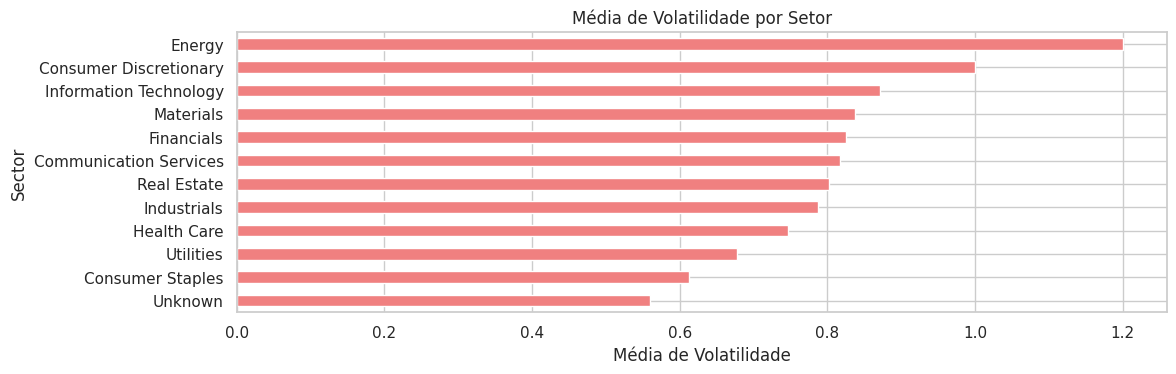

In [ ]:
# Gráfico de barras para média de volatilidade por setor
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
sector_stats['Volatility'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Média de Volatilidade por Setor')
plt.xlabel('Média de Volatilidade')

<Figure size 1200x800 with 0 Axes>

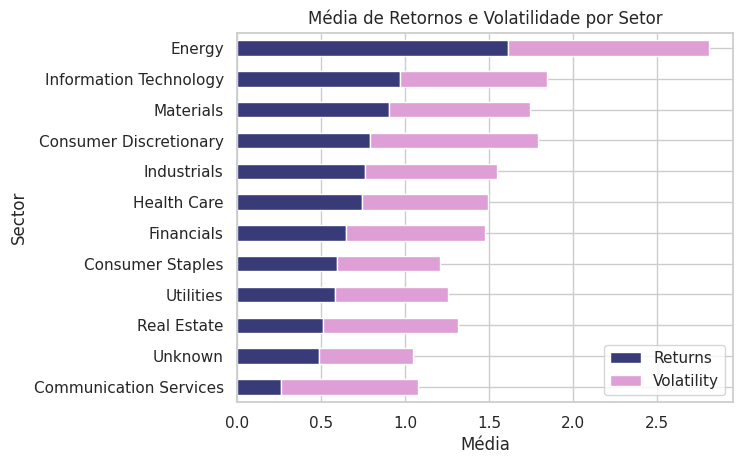

In [ ]:
# Visualizar as análises em um único gráfico com barras empilhadas
plt.figure(figsize=(12, 8))

# Barras empilhadas para média de retornos e volatilidade por setor
sector_stats.sort_values(by='Returns')[['Returns', 'Volatility']].plot(kind='barh', stacked=True, colormap='tab20b')

plt.title('Média de Retornos e Volatilidade por Setor')
plt.xlabel('Média')
plt.legend(loc='lower right')
plt.show()


## Conclusão:

O comportamento observado nos retornos e volatilidades dos setores pode ser influenciado por vários fatores econômicos e de mercado. Vale ressaltar que análises específicas dos setores requerem uma compreensão mais aprofundada dos eventos macroeconômicos, políticos e setoriais que ocorreram durante o período de 2020 a 2023. No entanto, posso fornecer algumas considerações gerais que podem explicar os padrões observados:


**Setor de Energia:**

Retorno Elevado: O setor de energia frequentemente responde a mudanças nos preços do petróleo e gás. Durante esse período, pode ter ocorrido um aumento nos preços dessas commodities, impulsionando os retornos do setor de energia.
Alta Volatilidade: A volatilidade no setor de energia pode ser influenciada por fatores como a flutuação nos preços das commodities, eventos geopolíticos e mudanças na demanda global.

**Setor de Tecnologia:**

Retorno Interessante e Alta Volatilidade: O setor de tecnologia muitas vezes apresenta retornos atraentes devido à inovação e ao crescimento rápido. No entanto, a volatilidade pode ser alta devido à sensibilidade a fatores como mudanças nas condições macroeconômicas, ciclos de produtos e concorrência intensa.

**Setor de Serviços de Comunicação:**

Baixo Retorno e Volatilidade Mediana: O setor de serviços de comunicação, que inclui empresas de telecomunicações, pode ter retornos mais estáveis, mas potencialmente mais baixos, devido à natureza mais estável da demanda por serviços essenciais de comunicação. A volatilidade pode ser mais moderada devido à natureza relativamente estável da indústria.

**Setor imobiliário:**
Retorno médio e volatilidade moderada: O setor tem essa característica por causa da natureza dos ativos, eles são ativos tangiveis (propriedades e terrenos) e isso gera um ativo mais estável; o clico do mercado imobiliário: ele opera em ciclos, períodos de expansão e contração e isso gera a volatilidade moderada, pois os preços dos imóveis e a demanda corresponde aos fatores econômicos e de mercado. Além de outras caracterísitcas como a sensibilidade as taxas de juros, desenvolvimento econômico, caráter defensivo em crises. Essas características fazem com que o setor imobiliário seja muitas vezes considerado como parte de uma estratégia de investimento diversificada, proporcionando estabilidade e renda ao longo do tempo.


Além dessas considerações, eventos específicos, como mudanças regulatórias, pandemias (por exemplo, a pandemia de COVID-19), e desenvolvimentos tecnológicos significativos, podem ter desempenhado papéis importantes nos movimentos observados nos setores.
